<a href="https://colab.research.google.com/github/rtealwitter/dl-demos/blob/main/demo02-backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Backpropagation

Recall our three step recipe for machine learning:

1. An **model** to make predictions.

2. A **loss function** to measure the quality of the predictions.

3. An **optimizer** to update the model so that it makes better predictions.

As we've seen in lecture, almost every optimizer uses some form of gradient descent to reduce the loss function by changing the *parameters* of the model. In this demo, we'll see how we can compute the gradients using backpropagation.

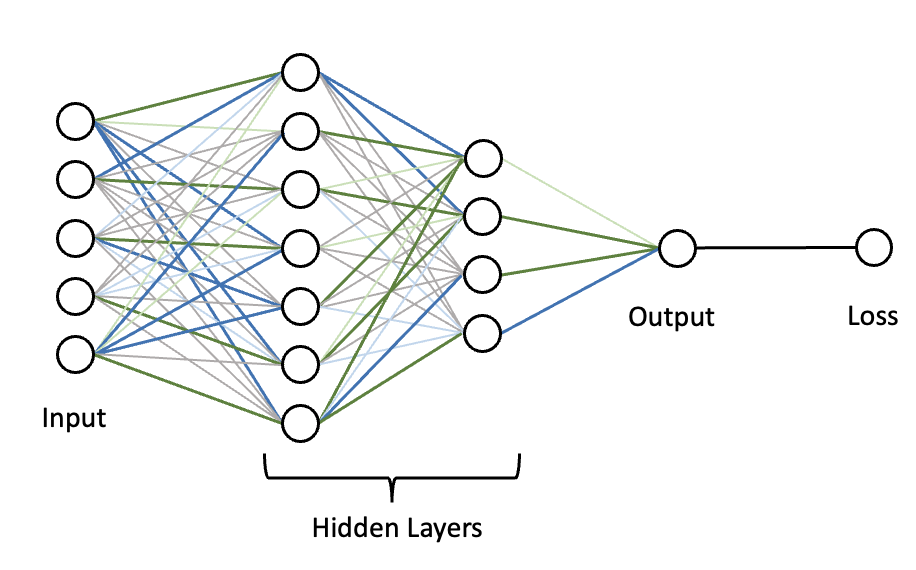

In the figure above, we have a general neural network where every neuron represents a real number. There is some input to the network in a vector from. We multiply each input by a weight (associated with every edge) and get two hidden layers of  neurons. Then we combine the hidden layers using yet more weights and finally get an output. But we're not done because we need to determine how good our output is. We compare to a true label and now we have the loss.

Recall that our goal is to minimize the loss over the choices of the weights. Backpropagation gives us a way to determine the derivative of the loss with respect to each one of the weights. Now this is very useful: if the derivative with respect to some weight is positive and large (bold blue), we know that if we increase the weight we get a big increase in the loss. As a result, we now know **we should decrease the weight** by a lot so that we can decrease the loss function.

On the other hand, if the derivative with respect to some weight is negative and large (bold green), we know that if we increase the weight we get a big decrease in the loss. As a result, we now know **we should increase the weight** by a lot so that we can decrease the loss function.

In mathematical notation, if we know $\frac{d L}{d w_j}$ the derivative of the loss with respect to a weight $w_j$,
then we should update the weight in the opposite direction of its derivative so that the loss will decrease
$$
w_j \gets w_j - \alpha \frac{d L}{d w_j}
$$
where $\alpha$ is a small learning rate.

Let's go through an example.

In [2]:
import numpy as np

## Scalar Example

Let's consider the very simple example of linear regression on a single variable $x$ with true label $y$.

We build a very simple model

$$
y' = x w + b.
$$

Then the loss *with respect to parameters* $w$ and $b$ is

$$
L(w,b) = (y' - y)^2 = (xw + b - y)^2.
$$

Now from the chain rule, we can compute the derivative of the loss with respect to $w$ and $b$:

$$
\frac{d L}{d w} = 2(xw + b - y) \frac{d(xw+b-y)}{dw} = 2(xw + b - y) x
$$
and
$$
\frac{d L}{d b} = 2(xw + b - y) \frac{d(xw+b-y)}{db} = 2(xw + b - y).
$$

Let's see how we'd do this in practice.

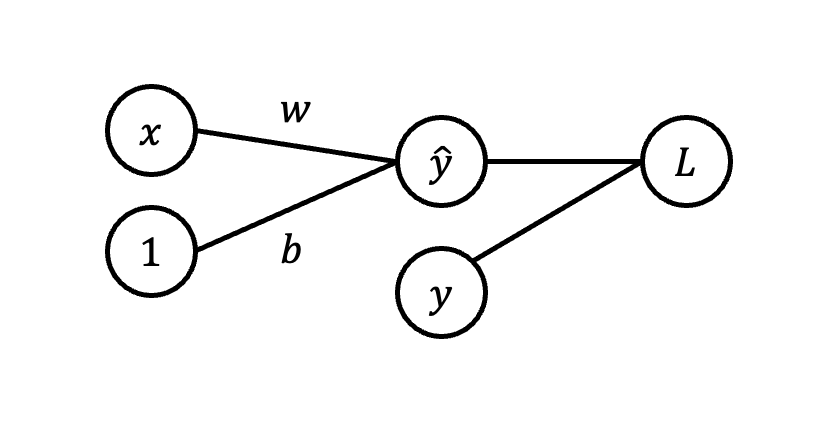

In [22]:
# Data
x = 10
y = 3

# Initialize model
w = np.random.normal()
b = np.random.normal()

Now that we have our data and our model, let's see what our loss is.

In [14]:
# Compute loss
def compute_loss(x, y, w, b):
  y_pred = x * w + b
  loss = (y_pred - y)**2
  return loss

loss = compute_loss(x,y,w,b)
print('Loss:', loss)

Loss: 134.74773653404418


Oop! Pretty bad! Time to do some gradient descent. But first, we need to compute the gradient.

In [9]:
# Compute gradient
# Note: gradient is vector of derivatives
def compute_gradient(x, y, w, b):
  y_pred = x * w + b
  dLdw = 2 * (y_pred - y) * x # dL / dw
  dLdb = 2 * (y_pred - y)
  return [dLdw, dLdb]

gradient = compute_gradient(x,y,w,b)
print('gradient:', gradient)

gradient: [-296.7667576336196, -29.676675763361956]


Now that we have a method for computing the gradient. Let's do some gradient descent.

In [24]:
num_epochs = 10
learning_rate = .001

for epoch in range(num_epochs):
  loss = compute_loss(x, y, w, b)
  print('Loss:', loss)
  gradient = compute_gradient(x, y, w, b)
  w = w - learning_rate * gradient[0]
  b = b - learning_rate * gradient[1]

Loss: 4.5483658595025345
Loss: 2.896417572794652
Loss: 1.8444502960259255
Loss: 1.1745533263104937
Loss: 0.7479602564078275
Loss: 0.47630408312153005
Loss: 0.30331234534812335
Loss: 0.19315051476706616
Loss: 0.12299902040572681
Loss: 0.07832626819044838
Loss: 0.049878480888750444
Loss: 0.0317628161438799
Loss: 0.020226688371687285
Loss: 0.012880436061843982
Loss: 0.008202313205926579
Loss: 0.005223265858786855
Loss: 0.0033261965919389033
Loss: 0.002118135294533031
Loss: 0.0013488370280998164
Loss: 0.0008589448148420736
Loss: 0.0005469794938706843
Loss: 0.00034831872961481954
Loss: 0.00022181076029363433
Loss: 0.00014124997939803417
Loss: 8.994855188058682e-05
Loss: 5.727959763176081e-05
Loss: 3.6475876890299257e-05
Loss: 2.322798430724982e-05
Loss: 1.479167331879558e-05
Loss: 9.419396736101134e-06
Loss: 5.998309519137761e-06
Loss: 3.819747495023662e-06
Loss: 2.4324304838216994e-06
Loss: 1.5489814618186515e-06
Loss: 9.86397590812095e-07
Loss: 6.28141931419283e-07
Loss: 4.000032944955958

That's a pretty great improvement in the loss! But, to be honest, it took some experimentation with different values of the learning rate. This process is called *hyperparameter tuning*.

**VERY IMPORTANT TIP**: If your loss is decreasing slowly, try *increasing* your learning rate. If your loss is going all over the place, try *decreasing* your learning rate.

Let's see the result in practice:

In [25]:
y_pred = (x * w + b)
print('Prediction:', y_pred)
print('True value:', y)

Prediction: 2.999999999661766
True value: 3


## Multivariate Example

Of course, the data we're actually interested in learning is in very high dimensions. So we'll need to go beyond scalers.

Let's consider a slightly larger version of linear regression where we have more features and more examples to fit.

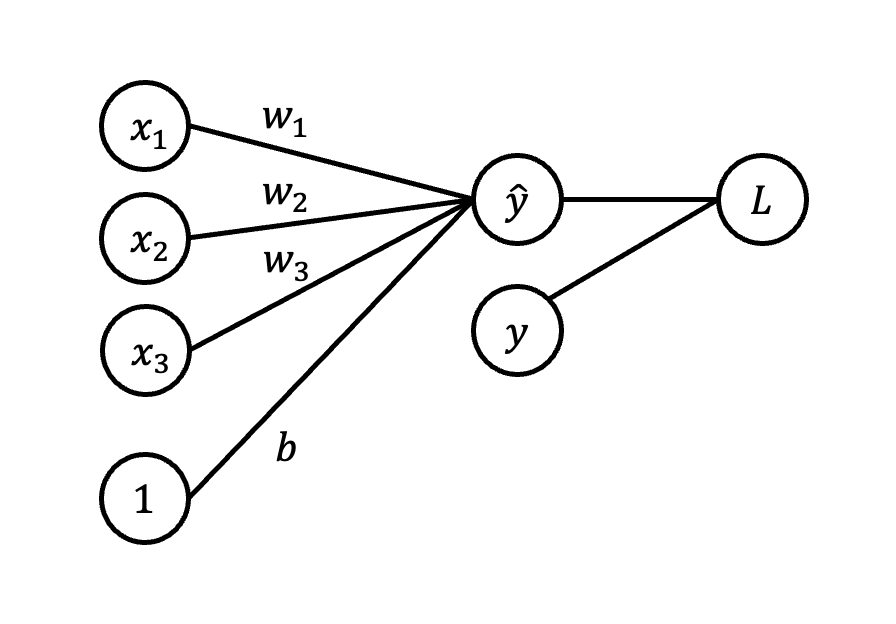

In [34]:
# Number of samples
n = 10
# Number of features
d = 3

## Data
X = np.random.normal(size=(10, 3))
y = np.random.normal(size=(10))


A very helpful skill is to start by understanding our data. Let's take a look.

In [52]:
print('X')
print(X.shape)
print(X)

print('y')
print(y.shape)
print(y)

X
(10, 3)
[[-1.23173287 -0.34178013 -0.28602499]
 [ 0.13241506 -0.15887051 -0.2125479 ]
 [ 0.10091878  0.92859147 -0.706952  ]
 [ 2.09133613  0.30730822 -1.54872666]
 [ 1.64487086 -0.14942879 -0.26585454]
 [-0.70991035  0.46989948  0.3208166 ]
 [-1.96667933  0.76261763 -0.60873358]
 [-0.06713826  0.87212747 -2.08376987]
 [ 1.21927489 -2.12759229 -1.01003865]
 [ 0.06607663 -0.8132013   0.44408594]]
y
(10,)
[ 0.71066863  0.88929635 -0.50410117 -0.39824911 -1.54619528 -0.02864745
  0.62574833  1.7279639   3.27532685  1.15720793]


Now let's initialize our linear model. We'll need $d$ weights (one for each feature) and one bias term.

In [57]:
# Initialize model
w = np.random.normal(size=d)
b = np.random.normal()

print('w')
print(w)
print('b')
print(b)

w
[-0.66930136 -1.38127273 -0.09446428]
b
0.7900762096082348


Let's make predictions using our model.

In [45]:
def predict(X, w, b):
  y_pred = X @ w + b
  return y_pred

# X shape
print(X.shape)
# w shape
print(w.shape)
# b (shape)
print(b)

# Output shape is ... 10
predict(X, w, b)

(10, 3)
(3,)
0.04202270718411606


array([ 0.61433699, -0.31994811,  0.82152379, -1.85898544, -1.62097157,
        1.29270919,  2.42990022,  0.48563281, -3.77817551, -0.8256244 ])

Perfect! All the shapes are lining up. Let's figure out how to take the gradient. We won't prove this here, but the gradient behaves very similarly to the derivative.

Our model gives $y' = X w + b$. The loss is still given by the difference between $y'$ and $y$ squared. But, since both are now vectors, we need to take the difference betweeen the value in each dimension squared and add it up. This is called the $\ell_2$-norm.

So the loss is given by $L(w, b) = \| X w + b - y\|_2^2$. The gradient a $d$-dimensional vector where each entry is $\frac{dL}{d w_j}$ for weight $w_j$.

$$
\nabla_w L = 2 (X w + b - y) \nabla_w (X w + b - y)
$$
$$
= 2 (X w + b - y) \nabla_w X w
$$
$$
= 2 X^\top (X w + b - y).
$$

Notice how this is similar to the derivative we computed before!!

Except we multiply by $X^\top$ on the left. We can see this is the right thing to do by following dimensional analysis: $X$ is $n \times d$, $w$ is $d$, $b$ is $n$, and $y$ is $n$. So the term on the right in the parantheses is $n$ dimensional. But we know the gradient is $d$ dimensional (the number of weights) *and* that we multiply by $X$ by the chain rule. Therefore we must multiply by $X^\top$ on the left since $X^\top$ is $d \times n$.


Let's code this up in practice.

In [47]:
def compute_gradient(X, y, w, b):
  y_pred = predict(X, w, b)
  gradient_w = 2 * X.T @ (y_pred - y)
  gradient_b = 2 * (y_pred - y).sum() # Can you see why this is the "gradient" for b?
  return gradient_w, gradient_b


Now we can do some training using *very similar* code to what we used before!

In [58]:
num_epochs = 100
learning_rate = .01

for epoch in range(num_epochs):
  y_pred = predict(X, w, b)
  loss = ((y_pred - y)**2).sum()
  print('Loss:', loss)
  gradient_w, gradient_b = compute_gradient(X, y, w, b)
  w = w - learning_rate * gradient_w
  b = b - learning_rate * gradient_b

Loss: 9.108024811414547
Loss: 7.993714754270412
Loss: 7.172004763926364
Loss: 6.535642740155829
Loss: 6.027390054344104
Loss: 5.613189159798093
Loss: 5.270772996235308
Loss: 4.984538221840851
Loss: 4.743038231451748
Loss: 4.537627636966278
Loss: 4.361651333395396
Loss: 4.209916566467025
Loss: 4.078327784619035
Loss: 3.963624021510774
Loss: 3.863185441943546
Loss: 3.7748887240247635
Loss: 3.696997910426174
Loss: 3.628081458640738
Loss: 3.5669488421099933
Loss: 3.5126018377133406
Loss: 3.4641968977520343
Loss: 3.4210159203333905
Loss: 3.382443405808056
Loss: 3.3479484867754543
Loss: 3.317070691907914
Loss: 3.289408582683316
Loss: 3.264610611183637
Loss: 3.242367704149261
Loss: 3.222407196612787
Loss: 3.2044878274445137
Loss: 3.1883955763153775
Loss: 3.1739401723701426
Loss: 3.160952143380265
Loss: 3.14928030336493
Loss: 3.1387895989179264
Loss: 3.129359251472999
Loss: 3.1208811457686574
Loss: 3.1132584248020354
Loss: 3.1064042593169754
Loss: 3.1002407659007973
Loss: 3.0946980524787855
Lo

Let's compare our prediction to the true value.

In [59]:
y_pred = predict(X, w, b)
print('Prediction:', y_pred)
print('True value:', y)

Prediction: [ 1.64490126  0.34544742 -0.56423787 -0.19767277 -0.68242524 -0.50442943
  1.02120804  1.16003097  3.13934711  0.5547918 ]
True value: [ 0.71066863  0.88929635 -0.50410117 -0.39824911 -1.54619528 -0.02864745
  0.62574833  1.7279639   3.27532685  1.15720793]


In some sense, this is a really hard problem because we have only four things we can change (three weights and one bias) to try to fit 10 different values. What do you think would happen if we increased the number of weights we had?

## Autodiff

So far, we've computed the gradients explicitly. This works because our model is so simple but it becomes an absolute pain when our model is more complicated. In the homework, you'll do it by hand for a model with a hidden layer, a non-linear activation, and a different loss function.

The solution is autodiff which is short for "auto differentiation". The idea is to automatically run backpropagation if we think of each neuron as its own little unit and give it enough information to **modularly** compute its derivative.

The key observation is to think of the model as a big feed-forward network. Then to compute the gradient with respect to some variable $u$, I *only* need to know the gradient with respect to the variables that it helped create.

![image](https://windowsontheory.files.wordpress.com/2021/12/backprop.png)

We know $\frac{dz}{du}$ by the multivariate chain rule.

There's another demo [here](https://github.com/rtealwitter/dl-demos/blob/10f28dc9a9dbf4db035fea04491adb570df88980/demo02-autodiff.ipynb) that explains the chain rule. But I'm not sure it's worth learning the machinics of how it works.
